# Recitation 0T: Losses (Part 1)

TA: Dheeraj Mohandas Pai (dheerajpai@cmu.edu)

## Content

1. Recap - Importance of losses
2. Recap - Different kinds of losses
3. Pytorch implementation of losses and visualization.
4. Choosing the Right Loss Function
5. Useful loss functions for the course - CrossEntropy, CTCLoss.
5. Writing your own custom losses - Focal loss


# Recap - Loss functon

 A loss function provides a quantitative measures of the difference between the predicted output and the actual target values (ground truth "empherical function"). In the case of NNs the loss functions must be differentiable in order perform backpropogation and calculate gradients.

Forward pass

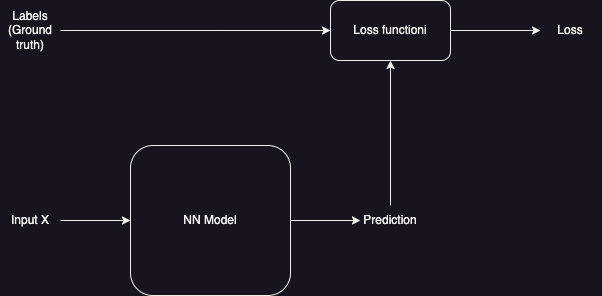

Backward pass

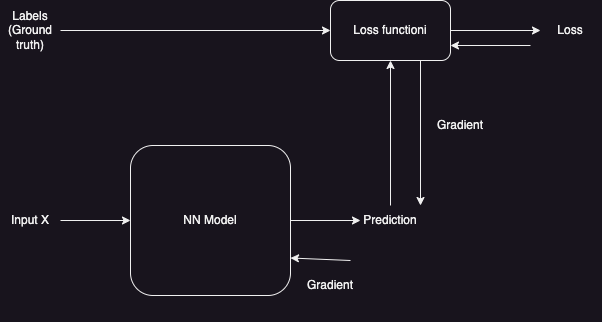



Choosing a suitable loss function will impact

1. How fast the training converges.

2. How resilient is the optimization against the stocasticity in the batch?(Whether the initial randomness determine the convergence or not, example - contrastive losses)

3. Model performance (Test accuracy).




# Some of the most used loss functions


1. $$\text{Cross-Entropy Loss}(y, t) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} t_{i,j} \cdot \log(y_{i,j})
$$

1. $$\text{BCELoss}(y, t) = -\frac{1}{N} \sum_{i=1}^{N} \left[ t_i \cdot \log(y_i) + (1 - t_i) \cdot \log(1 - y_i) \right]$$

2. $$\text{L1 Loss}(y, t) = \frac{1}{N} \sum_{i=1}^{N} |y_i - t_i|$$


4. $$\text{Hinge Loss}(y, t) = \frac{1}{N} \sum_{i=1}^{N} \max(0, 1 - t_i \cdot y_i)$$




# Selecting the right type of Loss function

1. **Problem Type**:
   - **Regression**:
     - Mean Squared Error (MSE) - [`nn.MSELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
     - Mean Absolute Error (MAE) - [`nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)
     - Huber Loss (smooth MAE) - [`nn.SmoothL1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.SmoothL1Loss.html)
   - **Binary Classification**:
     - Binary Cross-Entropy (Log Loss) - [`nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html)
     - Hinge Loss (for SVMs) - [`nn.HingeEmbeddingLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.HingeEmbeddingLoss.html)
   - **Multiclass Classification**:
     - Categorical Cross-Entropy - [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
     - Sparse Categorical Cross-Entropy - use [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) with long tensor as target.
     - Kullback-Leibler Divergence - [`nn.KLDivLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.KLDivLoss.html)


2. **Model Robustness**:
   - If you have large **outliers** in your data:
     - Consider using **Huber Loss** or **Mean Absolute Error**:
       - [`nn.SmoothL1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.SmoothL1Loss.html) and [`nn.L1Loss()`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)
      - Avoid using loss functions that provide disproportionately large penalty for outliers (For example Hinge loss (SVM))



4. **Optimization and Stability**:
   - For **Convergence Speed** and **Stability** considerations:
     - Cross-Entropy can result in more stable training for deep neural networks (Used for Multi-class classification), :
       - [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
    - Numerical stability
        - Binary Cross-Entropy (per class) - [`nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html)

5. **Class Imbalance**:
   - For datasets with class imbalance:
     - Consider using **Weighted Cross-Entropy** or focal loss:
       - [`nn.CrossEntropyLoss(weight=weights)`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) where `weights` is a tensor of weights for each class.
       - Focal Loss: Provide more weightage to the misclassidfied samples over cirrectly classified samples
6. **Domain-Specific Requirements**:
   - Custom loss functions might be needed depending on the application. For example: CTCLoss in Seq2Seq models



9. **Experimentation**:
   - Trying multiple loss functions and comparing their performance on a validation set is often beneficial.


Note: Check the PyTorch documentation for the most up-to-date and detailed information about each loss function.

# Pytorch implementation of losses

Link: https://pytorch.org/docs/stable/nn.html#loss-functions


PyTorch, provides an extensive collection of pre-defined loss functions, easing the process of training neural networks.

These loss functions are encapsulated as classes within the torch.nn module and can be easily integrated into any deep learning model.

Examples: Cross Entropy Loss (`nn.CrossEntropyLoss`) Mean Squared Error Loss (`nn.MSELoss`), Binary Cross-Entropy Loss (`nn.BCELoss`), Hinge Loss (`nn.HingeEmbeddingLoss`), and the more complex Connectionist Temporal Classification Loss (`nn.CTCLoss`) for Seq2Seq models (useful in HW3).

You will also learn about contrastive losses in your second homework.

Note: Implementing a loss function within the training loop in PyTorch involves instantiating the desired loss class (outside the loop)and then calling it with the predicted outputs and target values. OR using the loss functions directly from nn.functional

In [49]:
import torch
from torch import nn

# Example

In [50]:
import torch.nn as nn
#Set torch seed
torch.random.manual_seed(11785)
loss = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
output.backward()
print(output, input.grad)


tensor(2.8122, grad_fn=<MseLossBackward0>) tensor([[ 0.1489, -0.4266,  0.4605, -0.0318, -0.0989],
        [-0.1532,  0.3122, -0.0547, -0.2333,  0.0392],
        [ 0.1239,  0.1491, -0.2590, -0.0149, -0.1950]])


# Pytorch `nn.functional` implementation

In [51]:
import torch.nn.functional as F

In [52]:
import torch.nn as nn

torch.random.manual_seed(11785)
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = F.mse_loss(input, target)
output.backward()
print(output, input.grad)

tensor(2.8122, grad_fn=<MseLossBackward0>) tensor([[ 0.1489, -0.4266,  0.4605, -0.0318, -0.0989],
        [-0.1532,  0.3122, -0.0547, -0.2333,  0.0392],
        [ 0.1239,  0.1491, -0.2590, -0.0149, -0.1950]])


# Example 2:  cosine Embedding loss (Cosine Similarity)

In [53]:
torch.random.manual_seed(11785)
loss = nn.CosineEmbeddingLoss()
input1 = torch.randn(1, 5, requires_grad=True)
input2 = torch.randn(1, 5, requires_grad=True)
target = torch.tensor([1]) # Y = 1 means the output are same
output = loss(input1, input2, target)
output.backward()

# Ideally the loss should be 0
output_same = loss(input2, input2, target)
output_same.backward()
print(output, output_same)

tensor(1.3157, grad_fn=<MeanBackward0>) tensor(0., grad_fn=<MeanBackward0>)


# Visualizing Losses

The first way to compare and contrast different losses for your models is to visualize them for the range of target values

# Example

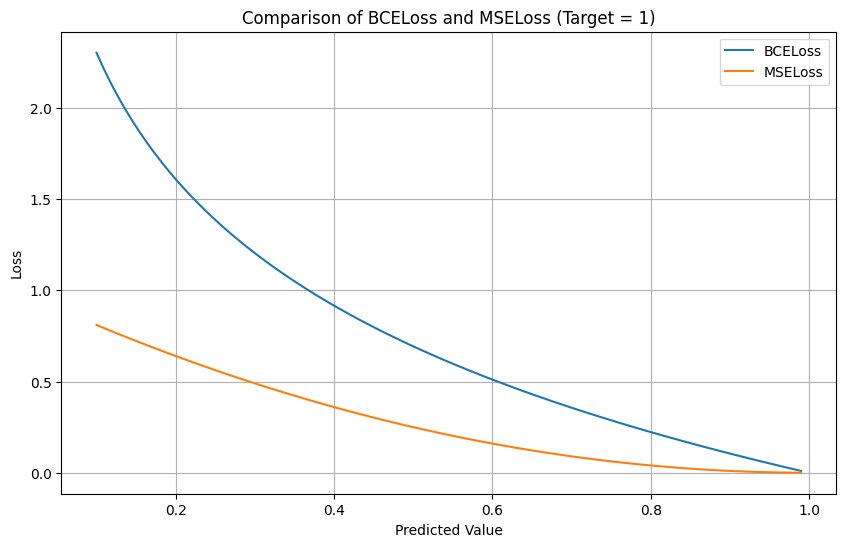

In [54]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Define the loss functions
bce_loss = nn.BCELoss()
mse_loss = nn.MSELoss()

predictions = torch.linspace(0.1, 0.99, 98)

# Target value - Currently using 1 as target value.

target = torch.ones(100)

# Calculate the losses
bce_losses = [bce_loss(torch.tensor([pred]), torch.tensor([1.0])).item() for pred in predictions]
mse_losses = [mse_loss(torch.tensor([pred]), torch.tensor([1.0])).item() for pred in predictions]

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(predictions.numpy(), bce_losses, label='BCELoss')
plt.plot(predictions.numpy(), mse_losses, label='MSELoss')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.title('Comparison of BCELoss and MSELoss (Target = 1)')
plt.legend()
plt.grid(True)
plt.show()


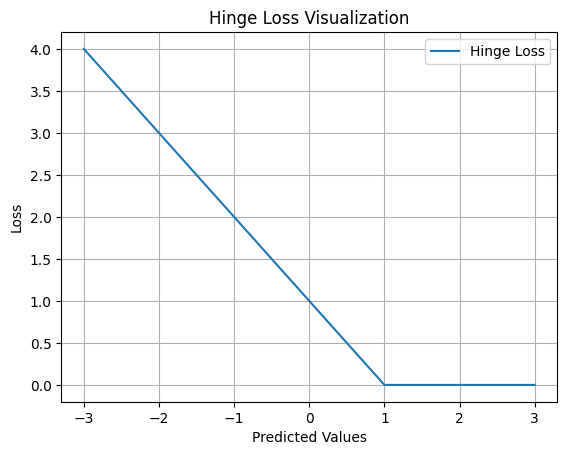

In [55]:
import torch
import matplotlib.pyplot as plt

# Function to calculate Hinge Loss manually
def hinge_loss_manual(y_pred, y_true):
    return torch.max(torch.zeros_like(y_pred), 1 - y_true * y_pred)

# Create a range of predicted values
predicted_values = torch.linspace(-3, 3, 100).view(-1, 1)

# Assume the true target is +1
target = torch.ones_like(predicted_values)

# Compute the Hinge Loss for the range of predicted values using the manual function
loss_values_manual = hinge_loss_manual(predicted_values, target)

# Plotting the Hinge Loss
plt.plot(predicted_values.numpy(), loss_values_manual.numpy(), label="Hinge Loss")
plt.xlabel("Predicted Values")
plt.ylabel("Loss")
plt.title("Hinge Loss Visualization")
plt.legend()
plt.grid(True)
plt.show()


# Writing custom losses

You can define your custom loss in pytorch as a function.

Example 1 (HingeLoss):

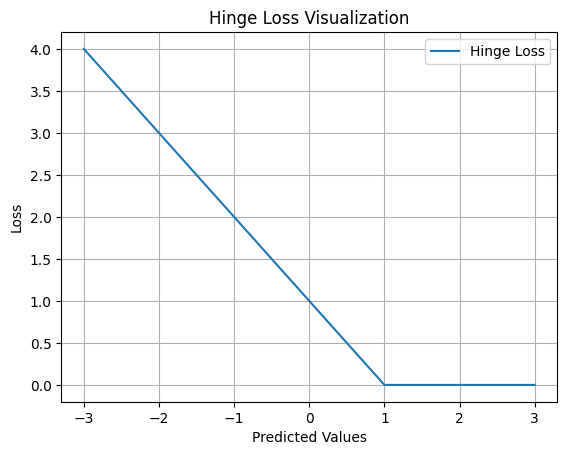

In [56]:
# Function to calculate Hinge Loss manually without using pytorch nn.Module
def hinge_loss_manual(y_pred, y_true):
    return torch.max(torch.zeros_like(y_pred), 1 - y_true * y_pred)


# Compute the Hinge Loss for the range of predicted values using the manual function
loss_values_manual = hinge_loss_manual(predicted_values, target)

# Plotting the Hinge Loss
plt.plot(predicted_values.numpy(), loss_values_manual.numpy(), label="Hinge Loss")
plt.xlabel("Predicted Values")
plt.ylabel("Loss")
plt.title("Hinge Loss Visualization")
plt.legend()
plt.grid(True)
plt.show()


# Writing custom functions-  Example 2: Focal Loss

- Focal loss was introduced to tackle significant class imbalances in deep learning tasks, especially in object detection scenarios like RetinaNet.
- By down-weighting easy-to-classify examples, focal loss allows models to concentrate on hard, misclassified instances, improving performance on minority classes.
- Beyond object detection, focal loss can benefit any task with pronounced class imbalance, such as medical imaging or fraud detection.



\begin{align*}
\text{Focal loss}(p_t) &= -\alpha_t (1 - p_t)^\gamma \log(p_t) \\
\text{where} \\
p_t & \text{ is the probability associated with the true class.} \\
\alpha_t & \text{ is a weighting factor for class } t. \\
\gamma & \text{ is the focusing parameter.}
\end{align*}


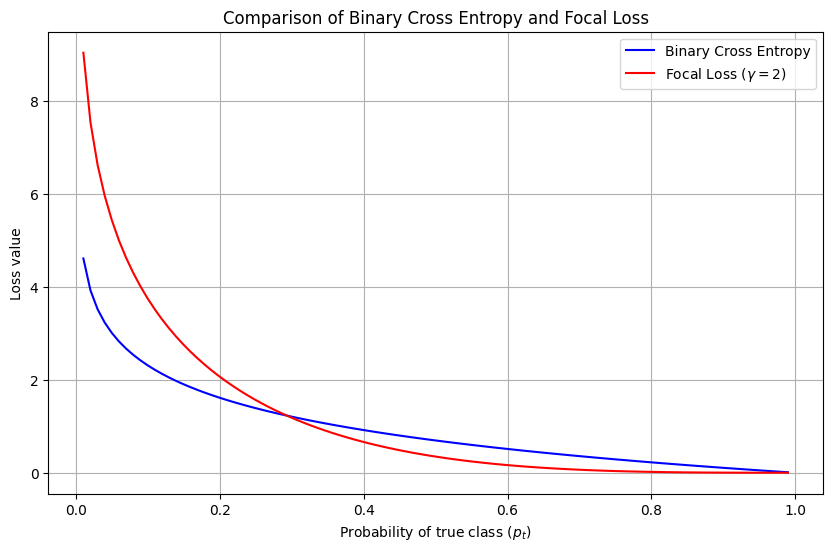

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def binary_cross_entropy(pt, alpha=1):
    return -alpha * np.log(pt)

def focal_loss(pt, gamma=2, alpha=1):
    return -alpha * (1 - pt) ** gamma * np.log(pt)

# Values
pt = np.linspace(0.01, 0.99, 100)

bce_loss = binary_cross_entropy(pt)
gamma = 2
fl_loss = focal_loss(pt, gamma=gamma,alpha = gamma)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pt, bce_loss, label="Binary Cross Entropy", color="blue")
plt.plot(pt, fl_loss, label="Focal Loss ($\gamma=2$)", color="red")
plt.xlabel("Probability of true class ($p_t$)")
plt.ylabel("Loss value")
plt.title("Comparison of Binary Cross Entropy and Focal Loss")
plt.legend()
plt.grid(True)
plt.show()


# Visualizing focal loss against Cross Entropy Loss



<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-58-d2f66faf8e88>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  losses = {gamma: focal_loss(pt, gamma=gamma, alpha= gamma if gamma is not 0 else 1) for gamma in gammas}


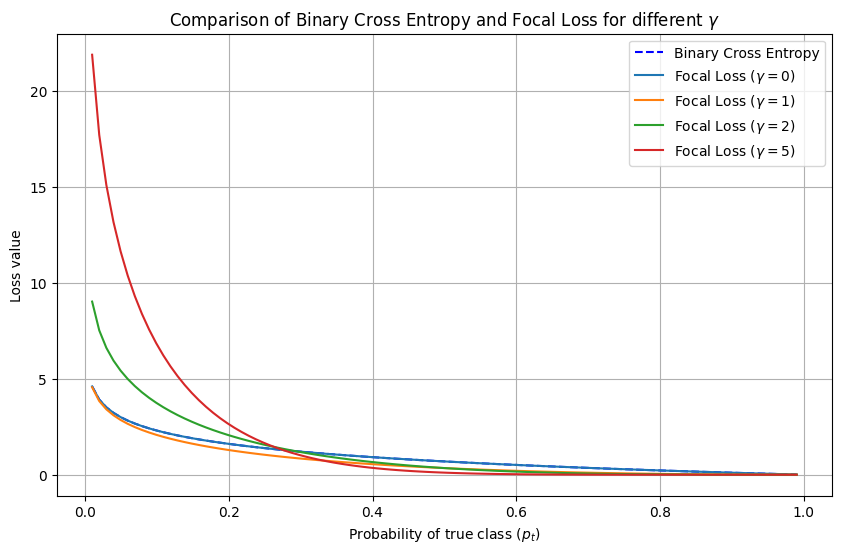

In [58]:
# Values for different gammas
gammas = [0, 1, 2, 5]
losses = {gamma: focal_loss(pt, gamma=gamma, alpha= gamma if gamma is not 0 else 1) for gamma in gammas}

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pt, bce_loss, label="Binary Cross Entropy", color="blue", linestyle="--")

for gamma, loss in losses.items():
    plt.plot(pt, loss, label=f"Focal Loss ($\gamma={gamma}$)")

plt.xlabel("Probability of true class ($p_t$)")
plt.ylabel("Loss value")
plt.title("Comparison of Binary Cross Entropy and Focal Loss for different $\gamma$")
plt.legend()
plt.grid(True)
plt.show()


# CTC Loss

In many of the previous examples, there was a direct one-to-one correspondence between the input and its label. However, this isn't always the case. Take speech-to-text models, for instance. As you'll observe in the upcoming assignments, the input length is determined by the speech sampling rate, while the output consists of a sequence of letters. These two often differ in length.


For such challenges, we employ specific loss functions tailored to address them. In the course, you'll come across the CTC Loss as one of these loss functions.



In [59]:
# Target are to be padded
T = 50      # Input sequence length
C = 20      # Number of classes (including blank)
N = 16      # Batch size
S = 30      # Target sequence length of longest target in batch (padding length)
S_min = 10  # Minimum target length, for demonstration purposes
# Initialize random batch of input vectors, for *size = (T,N,C)
input = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()
# Initialize random batch of targets (0 = blank, 1:C = classes)
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)
# Note that the input sequence length is different from target seq

input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)
ctc_loss = nn.CTCLoss()
loss = ctc_loss(input, target, input_lengths, target_lengths)
loss.backward()

# Documentation: https://pytorch.org/docs/stable/generated/torch.nn.CTCLoss.html



In [60]:
input_lengths, target_lengths

(tensor([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]),
 tensor([27, 23, 16, 16, 27, 26, 23, 29, 13, 18, 23, 13, 25, 11, 24, 20]))

Summary

- The choice of loss function directly influences training speed, optimization stability against batch stochasticity, and overall model test accuracy.

- In PyTorch, loss functions are available as stateful class-based versions for configurable and reusable losses, and as stateless functional versions for straightforward applications, both offering core functionality with different interaction methods.

- Custom and niche loss functions offer significant benefits; among the valuable losses you'll work with are CTC loss and contrastive losses such as cosine loss.

# References and further reading

1. A comprehensive survey on losses in machine learning: https://faculty.ist.psu.edu/vhonavar/Courses/ds310/lossfunc.pdf

2. Pytorch implementation of losses - https://pytorch.org/docs/stable/nn.html

3. Focal Loss for Dense Object Detection

https://arxiv.org/abs/1708.02002
